In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("ASIANPAINT_Dataset.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35591 entries, 0 to 35590
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              35591 non-null  datetime64[ns]
 1   Expiry            35591 non-null  datetime64[ns]
 2   t                 35591 non-null  int64         
 3   strike_price      35591 non-null  int64         
 4   underlying_value  35591 non-null  float64       
 5   sigma             35591 non-null  float64       
 6   r                 35591 non-null  float64       
 7   close             35591 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 2.2 MB


In [4]:
df.describe()

,Date,Expiry,t,strike_price,underlying_value,sigma,r,close
count,35591,35591,35591.000000,35591.000000,35591.000000,35591.000000,35591.000000,35591.000000
mean,2020-07-30 12:35:32.629035520,2020-09-12 12:00:15.779270144,43.975499,1837.912394,1970.402544,0.019941,0.035962,207.026833
min,2020-01-01 00:00:00,2020-01-30 00:00:00,0.000000,1300.000000,1498.450000,0.007787,0.029300,0.050000
25%,2020-05-04 00:00:00,2020-06-25 00:00:00,21.000000,1560.000000,1724.250000,0.015889,0.031500,57.900000
50%,2020-08-19 00:00:00,2020-09-24 00:00:00,43.000000,1800.000000,1891.300000,0.017918,0.032500,166.150000
75%,2020-11-03 00:00:00,2020-12-31 00:00:00,66.000000,2040.000000,2166.550000,0.019862,0.035200,324.750000
max,2020-12-31 00:00:00,2021-02-25 00:00:00,97.000000,3140.000000,2764.500000,0.052411,0.052800,1360.000000
std,NaN,NaN,26.347567,353.981841,309.650698,0.008570,0.007311,175.737167


In [5]:
df.head()

,Date,Expiry,t,strike_price,underlying_value,sigma,r,close
0,2020-01-01,2020-01-30,29,1980,1793.2,0.008151,0.0494,3.8
1,2020-01-01,2020-01-30,29,1440,1793.2,0.008151,0.0494,398.5
2,2020-01-01,2020-01-30,29,2020,1793.2,0.008151,0.0494,1.2
3,2020-01-01,2020-01-30,29,1920,1793.2,0.008151,0.0494,6.5
4,2020-01-01,2020-01-30,29,1940,1793.2,0.008151,0.0494,5.0


In [6]:
df.tail()

,Date,Expiry,t,strike_price,underlying_value,sigma,r,close
35586,2020-12-31,2021-02-25,56,2620,2764.5,0.015889,0.0308,40.15
35587,2020-12-31,2021-02-25,56,2640,2764.5,0.015889,0.0308,37.40
35588,2020-12-31,2021-02-25,56,2660,2764.5,0.015889,0.0308,34.80
35589,2020-12-31,2021-02-25,56,2680,2764.5,0.015889,0.0308,32.40
35590,2020-12-31,2021-02-25,56,2700,2764.5,0.015889,0.0308,30.10


In [7]:
df['sigma_20'] = df.groupby('strike_price')['close'].transform(lambda x: x.rolling(window=20).apply(lambda y: np.std(np.diff(y) / y[:-1])))

In [8]:
df.fillna(df.mean(), inplace=True)
print(df.columns)

Index(['Date', 'Expiry', 't', 'strike_price', 'underlying_value', 'sigma', 'r',
       'close', 'sigma_20'],
      dtype='object')


In [9]:
feature_columns = ['strike_price', 'underlying_value', 'sigma_20', 'r', 'close']
df.dropna(subset=feature_columns + ['close'], inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_columns],
    df['close'],
    test_size=0.1,
    random_state=42
)

In [23]:
n_units = 400
layers = 4
n_batch = 100
n_epochs = 40
learning_rate = 1e-3

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

In [25]:
call_model = Sequential()
call_model.add(Dense(n_units, input_dim=X_train_scaled.shape[1], activation='relu'))
for _ in range(layers - 1):
    call_model.add(Dense(n_units, activation='relu'))
call_model.add(Dense(1, activation='linear'))  
call_model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))


In [26]:
call_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 400)               2400      
                                                                 
 dense_6 (Dense)             (None, 400)               160400    
                                                                 
 dense_7 (Dense)             (None, 400)               160400    
                                                                 
 dense_8 (Dense)             (None, 400)               160400    
                                                                 
 dense_9 (Dense)             (None, 1)                 401       
                                                                 
Total params: 484001 (1.85 MB)
Trainable params: 484001 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
history = call_model.fit(X_train_scaled, y_train_scaled,
                         batch_size=n_batch, epochs=n_epochs,
                         validation_split=0.01,
                         callbacks=[TensorBoard()],
                         verbose=1)

Epoch 1/40
318/318 [==============================] - 2s 6ms/step - loss: 0.0097 - val_loss: 0.0014
Epoch 2/40
318/318 [==============================] - 2s 5ms/step - loss: 1.4808e-04 - val_loss: 6.0433e-05
Epoch 3/40
318/318 [==============================] - 2s 6ms/step - loss: 9.6285e-05 - val_loss: 3.7444e-04
Epoch 4/40
318/318 [==============================] - 2s 5ms/step - loss: 6.9702e-04 - val_loss: 2.4803e-05
Epoch 5/40
318/318 [==============================] - 2s 5ms/step - loss: 4.0015e-05 - val_loss: 3.9938e-05
Epoch 6/40
318/318 [==============================] - 2s 5ms/step - loss: 2.8949e-05 - val_loss: 7.3717e-05
Epoch 7/40
318/318 [==============================] - 2s 5ms/step - loss: 6.2874e-04 - val_loss: 4.5493e-05
Epoch 8/40
318/318 [==============================] - 2s 5ms/step - loss: 4.2005e-05 - val_loss: 6.5885e-06
Epoch 9/40
318/318 [==============================] - 2s 5ms/step - loss: 1.4998e-04 - val_loss: 1.4506e-04
Epoch 10/40
318/318 [===============

In [28]:
call_model.save('call_option_model.keras')

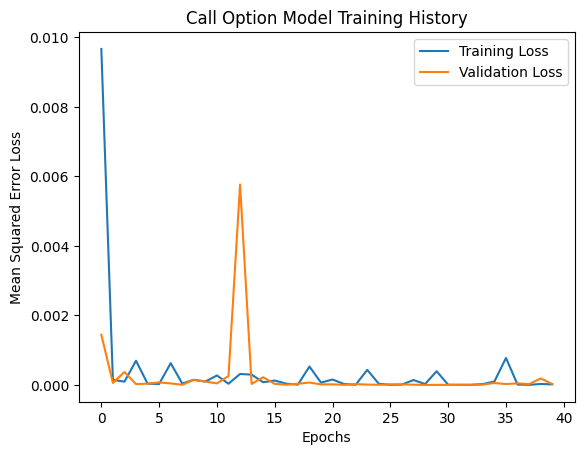

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Call Option Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

test_loss = call_model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Squared Error: {test_loss}')

call_predictions_scaled = call_model.predict(X_test_scaled)

call_predictions_rescaled = y_scaler.inverse_transform(call_predictions_scaled)

112/112 [==============================] - 0s 2ms/step - loss: 71595.0078
Test Mean Squared Error: 71595.0078125
112/112 [==============================] - 0s 2ms/step


In [31]:
mse = mean_squared_error(y_test, call_predictions_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, call_predictions_rescaled)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.9262957826485589
Root Mean Squared Error (RMSE): 0.9624426126520785
R-squared (R2): 0.9999696067267526


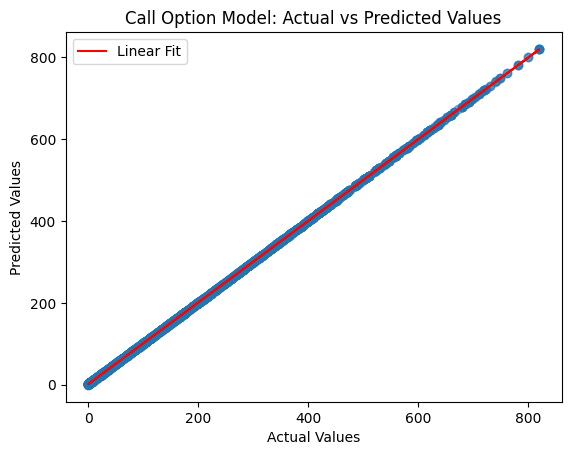

In [33]:
plt.scatter(y_test, call_predictions_rescaled, alpha=0.5)
plt.title('Call Option Model: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

fit_line = np.polyfit(y_test, call_predictions_rescaled.flatten(), 1)
fit_line_fn = np.poly1d(fit_line)
plt.plot(y_test, fit_line_fn(y_test), color='red', label='Linear Fit')

plt.legend()
plt.savefig('call_option_actual_vs_predicted_with_fit_line.png')
plt.show()